<a href="https://colab.research.google.com/github/jshwanth/ML/blob/main/ML_model_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
observations = 100
xs = np.random.uniform(low = -10,high=10, size= (observations,1))
zs = np.random.uniform(-10,10, size= (observations,1))
inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1,(observations,1))
ys = 2*xs - 3*zs + 5 + noise
np.savez('TF_intro', inputs=inputs, targets=ys)

In [ ]:
training_data = np.load('TF_intro.npz')
input_size = 2 #xs, zs
output_size = 1 #y

model = tf.keras.Sequential(
    [tf.keras.layers.Dense(output_size)]
)

model.compile(optimizer = 'sgd', loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)  #verbose= 0 -> silent
                                                                                     #verbose= 1 -> progress bar
                                                                                     #verbose= 2 -> one line per epoch

#loss function : 2x - 3z + 5 + noise

Epoch 1/100
4/4 - 0s - 113ms/step - loss: 116.4277
Epoch 2/100
4/4 - 0s - 16ms/step - loss: 20.9367
Epoch 3/100
4/4 - 0s - 14ms/step - loss: 18.8567
Epoch 4/100
4/4 - 0s - 15ms/step - loss: 17.3644
Epoch 5/100
4/4 - 0s - 14ms/step - loss: 14.0230
Epoch 6/100
4/4 - 0s - 14ms/step - loss: 11.3546
Epoch 7/100
4/4 - 0s - 14ms/step - loss: 9.8456
Epoch 8/100
4/4 - 0s - 15ms/step - loss: 8.5801
Epoch 9/100
4/4 - 0s - 15ms/step - loss: 7.1583
Epoch 10/100
4/4 - 0s - 13ms/step - loss: 5.7731
Epoch 11/100
4/4 - 0s - 16ms/step - loss: 5.2391
Epoch 12/100
4/4 - 0s - 14ms/step - loss: 4.8575
Epoch 13/100
4/4 - 0s - 13ms/step - loss: 3.9528
Epoch 14/100
4/4 - 0s - 13ms/step - loss: 3.2409
Epoch 15/100
4/4 - 0s - 13ms/step - loss: 3.2083
Epoch 16/100
4/4 - 0s - 15ms/step - loss: 2.4693
Epoch 17/100
4/4 - 0s - 15ms/step - loss: 2.0357
Epoch 18/100
4/4 - 0s - 15ms/step - loss: 1.8794
Epoch 19/100
4/4 - 0s - 14ms/step - loss: 1.5461
Epoch 20/100
4/4 - 0s - 15ms/step - loss: 1.3999
Epoch 21/100
4/4 - 0s

Extract the weights and biases

In [ ]:
model.layers[0].get_weights()

[array([[ 1.9894816],
        [-2.9885147]], dtype=float32),
 array([5.0181346], dtype=float32)]

In [ ]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9894816],
       [-2.9885147]], dtype=float32)

In [ ]:
biases = model.layers[0].get_weights()[1]
biases

array([5.0181346], dtype=float32)

Make predictions

In [ ]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[  3.1],
       [-41. ],
       [-11.3],
       [ -4.5],
       [ -6.5],
       [ 34.2],
       [ 23.8],
       [ 26.4],
       [-26.7],
       [-33.3],
       [ 18.3],
       [-12.9],
       [ -8.7],
       [ 14.4],
       [  2.3],
       [ 22.5],
       [ -6.9],
       [ 21.8],
       [-16.7],
       [ 25.9],
       [ 39.7],
       [ -7.5],
       [ 38. ],
       [-14.1],
       [ 16.3],
       [-24.1],
       [-32.8],
       [ 26.8],
       [-23.6],
       [ 37.8],
       [  3.1],
       [-16.7],
       [ 49.7],
       [ -9.7],
       [ 37.5],
       [ 13.8],
       [ 26. ],
       [  4.1],
       [  6.5],
       [ 47.6],
       [-26.9],
       [ 20.6],
       [ 36.8],
       [ 26.6],
       [  8.5],
       [ 18.5],
       [  0.7],
       [ 33.2],
       [ -6.9],
       [-18.5],
       [ 14.3],
       [  2.1],
       [-29.5],
       [ 29.3],
       [-10.5],
       [ -3.5],
       [ 38.4],
       [ 24.5],
       [-12.3],
       [-22.3],
       [ 37.8],
       [ 42.5],
       [

In [ ]:
training_data['targets'].round(1)

array([[  2.9],
       [-41.3],
       [-11.5],
       [ -5.2],
       [ -5.7],
       [ 35. ],
       [ 24.2],
       [ 27. ],
       [-27.3],
       [-34.5],
       [ 18.5],
       [-12.6],
       [ -8.3],
       [ 14.8],
       [  2.2],
       [ 22.1],
       [ -7. ],
       [ 22.4],
       [-16.5],
       [ 26. ],
       [ 39.1],
       [ -7.7],
       [ 37.5],
       [-14.2],
       [ 16.1],
       [-25.2],
       [-33.1],
       [ 26.2],
       [-23.6],
       [ 37.4],
       [  2.5],
       [-17.6],
       [ 50.1],
       [-10.5],
       [ 37.6],
       [ 13. ],
       [ 26.3],
       [  4.6],
       [  6.7],
       [ 47.7],
       [-27.7],
       [ 21.2],
       [ 37.6],
       [ 27.1],
       [  7.5],
       [ 18.4],
       [  0.6],
       [ 34.1],
       [ -6.3],
       [-18.8],
       [ 14.7],
       [  1.5],
       [-28.8],
       [ 29.6],
       [-10.2],
       [ -4.1],
       [ 37.8],
       [ 25. ],
       [-11.7],
       [-23.2],
       [ 38.8],
       [ 43.3],
       [

Plotting the data

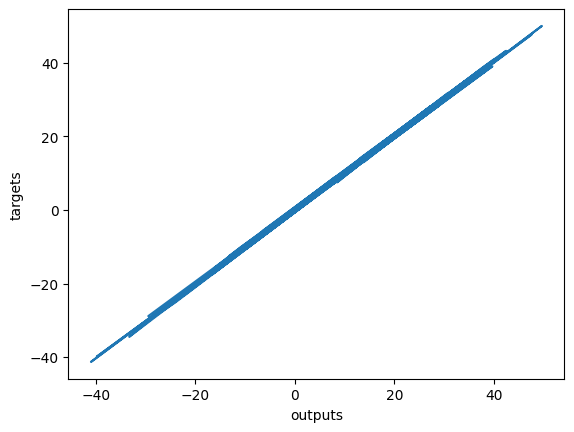

In [ ]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()
